In [1]:
#from: https://github.com/iShkiper/DSP_24.M20_21/blob/main/%D0%9A%D0%BE%D0%B4/1.8.1%20CWT_classification_on.ipynb
#dataset: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones
#model design source: https://github.com/taspinar/siml/blob/master/notebooks/WV3%20-%20Classification%20of%20signals%20using%20the%20CWT%20and%20CNN.ipynb

In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from tqdm import tqdm

In [3]:
activities_description = {
    1: 'walking',
    2: 'walking upstairs',
    3: 'walking downstairs',
    4: 'sitting',
    5: 'standing',
    6: 'laying'
}

def read_signals(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(lambda x: int(x)-1, activities))
    return activities

def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

INPUT_FOLDER_TRAIN = 'D:/DSP_ZADACHI/HAR_Dataset/train/Inertial Signals/'
INPUT_FOLDER_TEST = 'D:/DSP_ZADACHI/HAR_Dataset/test/Inertial Signals/'

INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

LABELFILE_TRAIN = 'HAR_Dataset/train/y_train.txt'
LABELFILE_TEST = 'HAR_Dataset/test/y_test.txt'

train_signals, test_signals = [], []

In [4]:
for input_file in INPUT_FILES_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
    train_signals.append(signal)
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

train_labels = read_labels(LABELFILE_TRAIN)
test_labels = read_labels(LABELFILE_TEST)

[no_signals_train, no_steps_train, no_components_train] = np.shape(train_signals)
[no_signals_test, no_steps_test, no_components_test] = np.shape(test_signals)
no_labels = len(np.unique(train_labels[:]))

print("Обучающая выборка состоит из {} сигналов, каждый сигнал длины {} и из {} компонент ".format(no_signals_train, no_steps_train, no_components_train))
print("Тестовая выборка состоит из {} сигналов, каждый сигнал длины {} и из {} компонент ".format(no_signals_test, no_steps_test, no_components_test))
print("Обучающая выборка состоит из {} меток классов с распределением:\n {}".format(np.shape(train_labels)[0], Counter(train_labels[:])))
print("Тестовая выборка состоит из {} меток классовс распределением:\n {}".format(np.shape(test_labels)[0], Counter(test_labels[:])))

uci_har_signals_train, uci_har_labels_train = randomize(train_signals, np.array(train_labels))
uci_har_signals_test, uci_har_labels_test = randomize(test_signals, np.array(test_labels))

Обучающая выборка состоит из 7352 сигналов, каждый сигнал длины 128 и из 9 компонент 
Тестовая выборка состоит из 2947 сигналов, каждый сигнал длины 128 и из 9 компонент 
Обучающая выборка состоит из 7352 меток классов с распределением:
 Counter({5: 1407, 4: 1374, 3: 1286, 0: 1226, 1: 1073, 2: 986})
Тестовая выборка состоит из 2947 меток классовс распределением:
 Counter({5: 537, 4: 532, 0: 496, 3: 491, 1: 471, 2: 420})


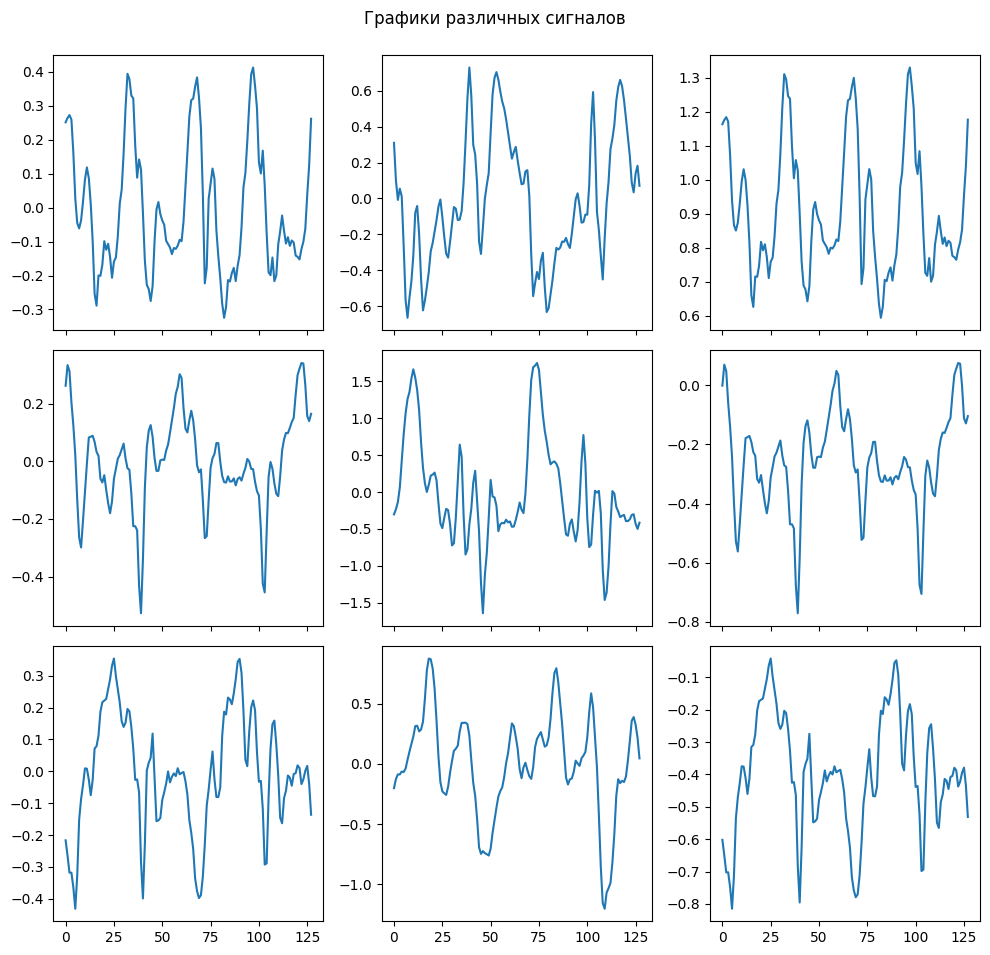

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
x = np.arange(0, 128, 1.0)
for i in range(3):
    for j in range(3):
        axs[i, j].plot(x, uci_har_signals_train[0,:,i+3*j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Графики различных сигналов")
plt.show()

In [6]:
scales = range(1,128,2)
waveletname = 'morl'
len(scales)

64

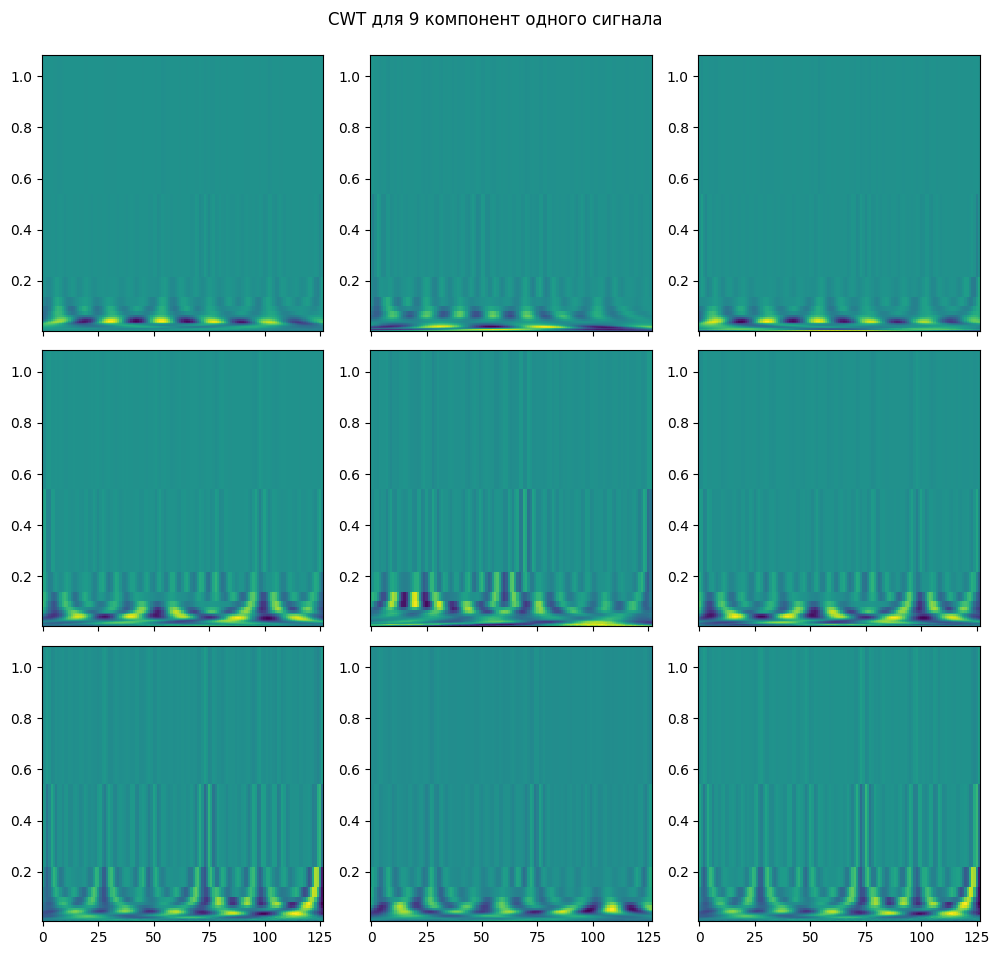

In [7]:
ii = 1000
data_cwt = np.ndarray(shape=(9, len(scales), 127))
freq_cwt = np.ndarray(shape=(9, len(scales)))

for jj in range(0,9):
    signal = uci_har_signals_train[ii, :, jj]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:127]
    data_cwt[jj, :, :, ] = coeff_.astype('float32')
    freq_cwt[jj, :] = freq

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)

for i in range(3):
    for j in range(3):
        axs[i,j].pcolormesh(np.arange(127), freq_cwt[i+3*j], data_cwt[i+3*j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("CWT для 9 компонент одного сигнала")
plt.show()

In [9]:
scales = range(1,128,2)
waveletname = 'morl'
train_size = 7352 
test_size = 2947

# Сформировать датасеты
train_data_cwt = np.ndarray(shape=(train_size, 9, len(scales), 127))
test_data_cwt = np.ndarray(shape=(test_size, 9, len(scales), 127))

for ii in range(0,train_size):
    if ii % 1000 == 0:
        print(ii)
    for jj in range(0,9):
        signal = uci_har_signals_train[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:9,:len(scales)]
        train_data_cwt[ii, :, :, jj] = coeff_

test_size = 500

for ii in range(0,test_size):
    if ii % 100 == 0:
        print(ii)
    for jj in range(0,9):
        signal = uci_har_signals_test[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:9,:len(scales)]
        test_data_cwt[ii, :, :, jj] = coeff_

0
1000
2000
3000
4000
5000
6000
7000
0
100
200
300
400


In [10]:
x_train = train_data_cwt
y_train = np.asarray(uci_har_labels_train[:train_size])
x_test = test_data_cwt
y_test = np.asarray(uci_har_labels_test[:test_size])
num_classes = 6

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (7352, 9, 64, 127)
7352 train samples
2947 test samples


In [11]:
import torch
import torch.nn as nn

def encode_labels(labels, num_of_classes): # is it really necessary to encode labels?
    num = len(labels)
    target = torch.zeros(num, num_of_classes).float()
    for i, l in enumerate(labels):
        target[i, l] = 1
    return target

target_train = encode_labels(y_train, num_classes)
target_test = encode_labels(y_test, num_classes)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class CWTDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X.astype('float32')
        self.y = y.type(torch.FloatTensor) 
        #self.X = X
        #self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
       
        if x.ndim == 2:
            x = x[np.newaxis, ...]
        if self.transform:
            x = self.transform(x)
        return torch.from_numpy(x), y

class SimpleCNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5,stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(31744, 1000),  # make auto sizing
            nn.ReLU(inplace=True),
            nn.Dropout(0.1),
            nn.Linear(1000, num_classes)
            
        )
        

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



In [13]:

from sklearn.model_selection import train_test_split

batch_size = 16

input_height, input_width = x_train.shape[1], x_train.shape[2]



train_ds = CWTDataset(x_train, target_train)
val_ds = CWTDataset(x_test, target_test)

    
  

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(in_channels=9, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)



In [14]:
# Функции обучения и оценки
def train_epoch(model, loader):
    model.train()
    loss_sum, correct, total = 0, 0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()*x.size(0)
        
        preds = out.argmax(dim=1)
        correct += (preds==y.argmax(dim=1)).sum().item()
        total += x.size(0)
    return loss_sum/total, correct/total


def eval_epoch(model, loader):
    model.eval()
    loss_sum, correct, total = 0, 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            
            loss = criterion(out, y)
            loss_sum += loss.item()*x.size(0)
            preds = out.argmax(dim=1)
            correct += (preds==y.argmax(dim=1)).sum().item()
            total += x.size(0)
    return loss_sum/total, correct/total

In [15]:
# Тренировочный цикл
epochs = 20
for epoch in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch(model, train_loader)
    val_loss, val_acc = eval_epoch(model, test_loader)
    print(f"Epoch {epoch}/{epochs}: train_loss={tr_loss:.4f}, train_acc={tr_acc:.4f}, "
          f"val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")
    #print(f"Epoch {epoch}/{epochs}: train_loss={tr_loss:.4f}, train_acc={tr_acc:.4f} ")

Epoch 1/20: train_loss=0.3912, train_acc=0.8362 
Epoch 2/20: train_loss=0.1657, train_acc=0.9329 
Epoch 3/20: train_loss=0.1416, train_acc=0.9427 
Epoch 4/20: train_loss=0.1342, train_acc=0.9436 
Epoch 5/20: train_loss=0.1137, train_acc=0.9516 
Epoch 6/20: train_loss=0.1221, train_acc=0.9499 
Epoch 7/20: train_loss=0.0908, train_acc=0.9607 
Epoch 8/20: train_loss=0.0890, train_acc=0.9629 
Epoch 9/20: train_loss=0.1110, train_acc=0.9648 
Epoch 10/20: train_loss=0.0676, train_acc=0.9723 
Epoch 11/20: train_loss=0.0532, train_acc=0.9780 
Epoch 12/20: train_loss=0.0468, train_acc=0.9816 
Epoch 13/20: train_loss=0.0459, train_acc=0.9797 
Epoch 14/20: train_loss=0.0809, train_acc=0.9762 
Epoch 15/20: train_loss=0.0616, train_acc=0.9758 
Epoch 16/20: train_loss=0.0492, train_acc=0.9833 
Epoch 17/20: train_loss=0.0375, train_acc=0.9856 
Epoch 18/20: train_loss=0.0298, train_acc=0.9897 
Epoch 19/20: train_loss=0.0278, train_acc=0.9897 
Epoch 20/20: train_loss=0.0214, train_acc=0.9914 


In [17]:
def eval_epoch_test(model, loader):
    model.eval()
    loss_sum, correct, total = 0, 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            
            loss = criterion(out, y)
            loss_sum += loss.item()*x.size(0)
            preds = out.argmax(dim=1)
            correct += (preds==y.argmax(dim=1)).sum().item()
            #print(preds)
            #print(y.argmax(dim=1))
            #print(correct)
            total += x.size(0)
            #print(total)
            
    return loss_sum/total, correct/total


val_loss, val_acc = eval_epoch_test(model, test_loader)
print(val_acc)

0.928
